In [1]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from collections import OrderedDict

## Dataset

In [2]:
dataset = torch.tensor([
    [1, 0, 2],
    [1, -2.5, -5],
    [1, 1, -1],
    [1, -3 , 4], 
    [0, 7, -1],
    [0, 8, -4],
    [0, 5, 3],
], requires_grad=True)

## Plotando o dataset

In [3]:
def plot_amostras(dataset, plt):
    for amostra in dataset:
        if amostra[0]>0:
            plt.scatter(amostra[1], amostra[2],color='orange', marker='o',s=70,label="maçã Fuji")
        else:
            plt.scatter(amostra[1], amostra[2],color='green', marker='o',s=70,label="banana-maçã")
    plt.ylabel('Comprimento')
    plt.xlabel('Peso')
    axes = plt.gca()
    axes.set_xlim([-10, 10])
    axes.set_ylim([-10, 10])
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    plt.legend(by_label.values(), by_label.keys())
    

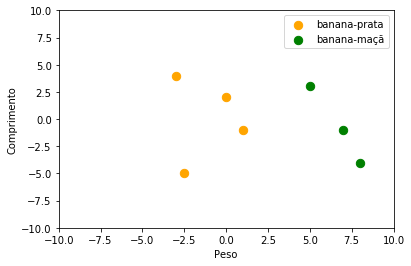

In [4]:
plot_amostras(dataset.detach(), plt)

## Incializando os parâmetros do neurônio

In [5]:
w = torch.tensor([-0.5,0.2], requires_grad=True)
w0 = torch.tensor([0.2], requires_grad=True)

## Plotando a reta de separação definida pelo neurônio

In [6]:
def reta_neuronio(x1, w, w0):
    x2 = (-w[0]*x1 - w0)/w[1]
    return x2

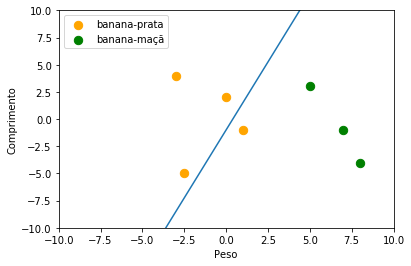

In [7]:
x1 = torch.tensor(range(-20, 20)).float()
x2 = reta_neuronio(x1.detach(), w.detach(), w0.detach())
plt.plot(x1.detach().numpy(), x2.detach().numpy())
plot_amostras(dataset.detach(), plt)

## Loop de treinamento

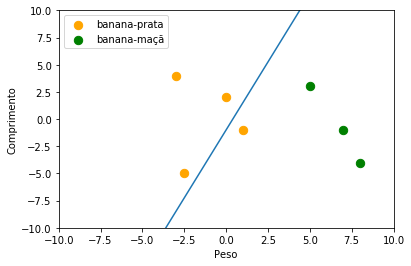

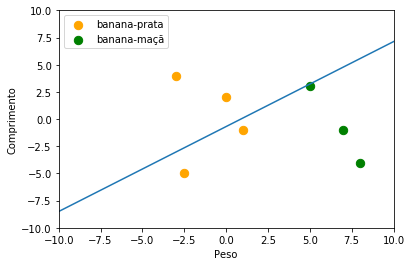

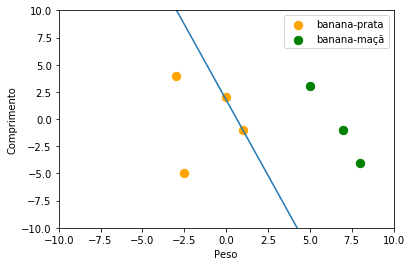

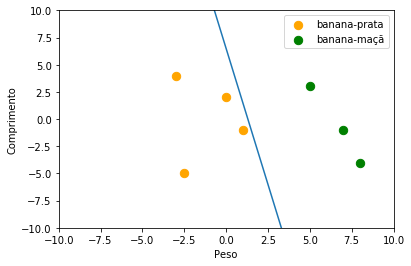

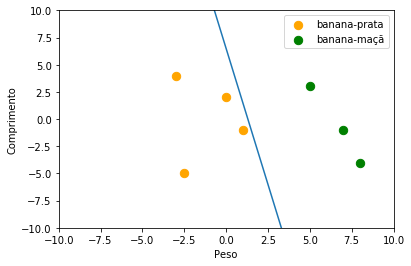

In [8]:
num_epocas = 5
for _ in range(num_epocas):
    
    x2 = reta_neuronio(x1, w, w0)
    plt.plot(x1.detach().numpy(), x2.detach().numpy())
    plot_amostras(dataset.detach(), plt)
    plt.show()
    
    for x in dataset:
        
        w.grad = torch.zeros(w.size())
        w0.grad = torch.zeros(w0.size())
        
       
        g = w[0]*x[1] + w[1]*x[2]  + w0
        
        g.backward()
        
        if(g>0 and x[0]==0):
            w.data.sub_(w.grad.data)
            w0.data.sub_(w0.grad.data)
            
        if(g<0 and x[0]==1):
            w.data.add_(w.grad.data)
            w0.data.add_(w0.grad.data)
            
    